# Data Analysis and EDA

In [74]:
import pandas as pd
import numpy as np
import re

In [75]:
df = pd.read_csv('./data/stackechange_csv/es.stackoverflow.com-posts.csv', sep=',')
df.dtypes  

Id                 int64
PostTypeId         int64
CreationDate      object
Score              int64
ViewCount        float64
FavoriteCount    float64
Title             object
Body              object
Tags              object
dtype: object

In [76]:
df['Body'].fillna('', inplace=True)
df['Title'].fillna('', inplace=True)
df['Tags'].fillna('', inplace=True)


In [77]:
# Convert Tags format <Tag1><Tag2> to List format [tag1, tag2, ...]
def tags_to_list(string):
    string = str(string)
    tags = []
    curr_tag = ''
    for s in string:
        curr_tag += s
        if s == '<':
            curr_tag = ''
        if s == '>':
            tags.append(re.sub('<|>', '', curr_tag))
    return tags

df['TagsList'] = df['Tags'].apply(tags_to_list)

In [78]:
# Add new column for post body length
df['BodyLength'] = df['Body'].apply(lambda x: len(str(x)))

In [79]:
# Plot body length distribution
df['BodyLength'].describe()
# df['BodyLength'].plot(kind='hist')

count    382763.000000
mean       1564.523313
std        2122.463665
min           0.000000
25%         500.000000
50%         944.000000
75%        1800.000000
max       46640.000000
Name: BodyLength, dtype: float64

In [80]:
# Duplicated posts by Id, Title, Body
print(df.duplicated('Id').any())
print(df.duplicated('Title').any())
print(df.duplicated('Body').any())

False
True
True


In [81]:
# Null values
df.isna().sum()

Id                    0
PostTypeId            0
CreationDate          0
Score                 0
ViewCount        200652
FavoriteCount    361224
Title                 0
Body                  0
Tags                  0
TagsList              0
BodyLength            0
dtype: int64

In [82]:
# FavoriteCount not NaN rows
df[df['FavoriteCount'].notna()].shape

(21539, 11)

In [83]:
# df[df['Tags'] == '<discussion>'].shape

<AxesSubplot:>

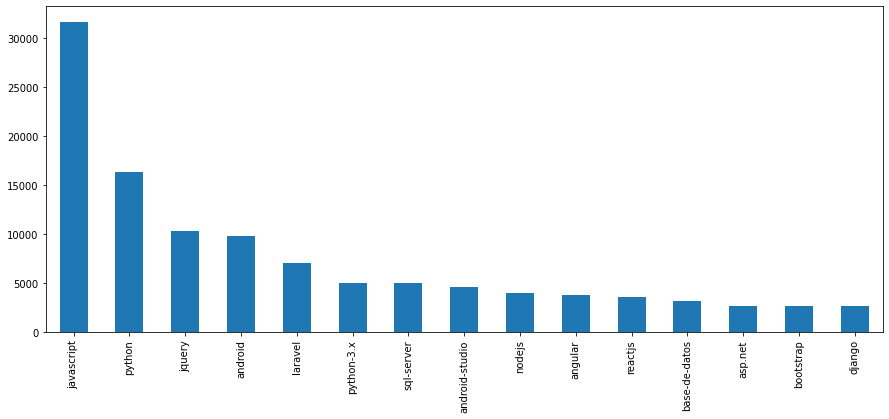

In [84]:
# Values counts on each Tag
df['TagsList'].explode().value_counts()

# Top 15 tags by numerosity
df['TagsList'].explode().value_counts().sort_values(ascending=False)[:15].plot(kind='bar', figsize=(15, 6))

In [100]:
# df['TagsList'].explode().value_counts().plot(kind='hist')

In [86]:
df['Tags'].unique().shape

(31357,)